SUPERMARKET SALES ANALYSIS

Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
sales=pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


WHAT CITY/ BRANCH HAD THE HIGHEST GROSS INCOME?

In [4]:
gross_income=sales.groupby('City').sum()

In [5]:
#dropping columns not needed for this question

City_income=gross_income.drop(['Unit price','Quantity','Tax 5%','cogs','gross margin percentage','Rating','Total'], axis=1)
print(City_income)


           gross income
City                   
Mandalay      5057.0320
Naypyitaw     5265.1765
Yangon        5057.1605


WHAT TIME OF THE DAY DO CUSTOMERS BUY THE MOST?

In [6]:
sales['Time']= pd.to_datetime(sales['Time'])

In [7]:
#converting the time from hour and minute to only Hour

sales['Hour']= sales['Time'].dt.hour
sales['Count'] = 1

In [8]:
sales.groupby(['Hour']).count()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Count
Hour,,,,,,,,,,,,,,,,,,
10,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101,101
11,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90,90
12,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89,89
13,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103,103
14,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83,83
15,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102,102
16,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77
17,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74,74
18,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93


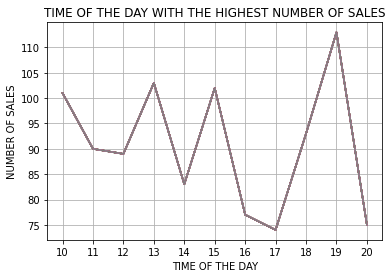

In [9]:
#plotting the graph

hours=[hours for hours, df in sales.groupby('Hour')]
plt.plot(hours, sales.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.title('TIME OF THE DAY WITH THE HIGHEST NUMBER OF SALES')
plt.xlabel('TIME OF THE DAY')
plt.ylabel('NUMBER OF SALES')
plt.show()

WHAT PRODUCT LINE SOLD THE MOST?

In [10]:
product_line=sales.groupby('Product line')
quantity= product_line.sum(['Quantity'])

product= [product for product, df in product_line]



In [11]:
quantity

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Hour,Count
Product line,,,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,51750.03,809.523810,2587.5015,1177.2,2548,170
Fashion accessories,10173.35,902,2585.9950,54305.8950,51719.90,847.619048,2585.9950,1251.2,2680,178
Food and beverages,9745.54,952,2673.5640,56144.8440,53471.28,828.571429,2673.5640,1237.7,2677,174
Health and beauty,8337.88,854,2342.5590,49193.7390,46851.18,723.809524,2342.5590,1064.5,2260,152
Home and lifestyle,8850.71,911,2564.8530,53861.9130,51297.06,761.904762,2564.8530,1094.0,2312,160
Sports and travel,9460.88,920,2624.8965,55122.8265,52497.93,790.476190,2624.8965,1148.1,2433,166


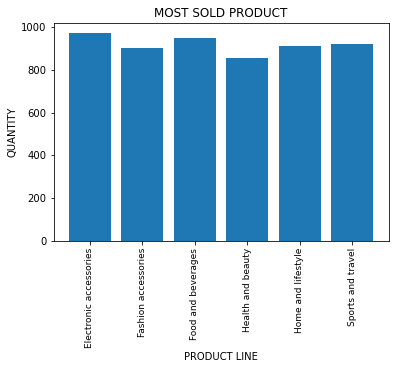

In [12]:
plt.bar(product, quantity['Quantity'])
plt.xticks(product,rotation='vertical',size=9)
plt.title('MOST SOLD PRODUCT')
plt.xlabel('PRODUCT LINE')
plt.ylabel('QUANTITY')
plt.show()


WHICH MONTH HAD THE HIGHEST SALES?

In [21]:
# adding a Month column from the Date column

sales['Month']= sales['Date'].str[0:1]

sales.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Hour,Count,Month,Sales
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2022-06-16 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,13,1,1,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2022-06-16 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,1,3,76.40


In [22]:
#adding a sales column

sales['Sales']= sales['Unit price'] * sales['Quantity']

In [23]:
sales_by_month=sales.groupby('Month').sum()
sales_by_month

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Hour,Count,Sales
Month,,,,,,,,,,,
1,19753.89,1965,5537.708,116291.868,110754.16,1676.190476,5537.708,2470.2,5215,352,110754.16
2,17159.52,1654,4629.494,97219.374,92589.88,1442.857143,4629.494,2142.6,4468,303,92589.88
3,18758.72,1891,5212.167,109455.507,104243.34,1642.857143,5212.167,2359.9,5227,345,104243.34


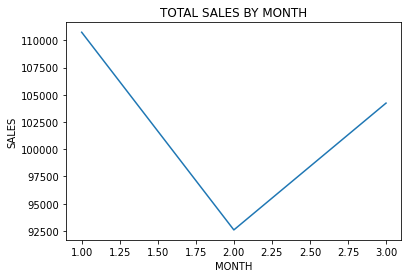

In [26]:
#plotting the graph

months=range(1,4)
plt.plot(months,sales_by_month['Sales'])
plt.title('TOTAL SALES BY MONTH')
plt.xlabel('MONTH')
plt.ylabel('SALES')
plt.show()

WHAT IS THE MOST PREFARED MODE OF PAYMENT?

c:\Users\ugoeze lucy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Payment', ylabel='count'>

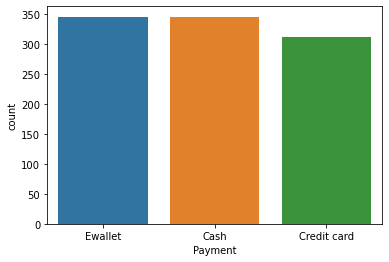

In [28]:
sn.countplot(sales['Payment'])